In [25]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import math
from keras.layers.core import Dense, Activation, Flatten, Dropout, Reshape
from keras.layers import Conv2D, LSTM, Embedding, Bidirectional, Input, merge, multiply, concatenate, add, GlobalAveragePooling1D, Layer, TimeDistributed, Conv1D, Lambda, Add
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import regularizers
from keras.models import Model
from keras import backend as K
import tensorflow as tf

from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.initializers import *


In [4]:
# Read sample from Dataset

with open('dataset/PELM/fixed_sequences_length_9/Group_Phos_S_pos.fasta', 'r') as f:
    PELM_s_positif_txt = f.readlines()
with open('dataset/PELM/fixed_sequences_length_9/Group_Phos_T_pos.fasta', 'r') as f:
    PELM_t_positif_txt = f.readlines()
with open('dataset/PELM/fixed_sequences_length_9/Group_Phos_Y_pos.fasta', 'r') as f:
    PELM_y_positif_txt = f.readlines()
with open('dataset/PPA/fixed_sequences_length_9/S_IDS_pos.fasta', 'r') as f:
    PPA_s_positif_txt = f.readlines()
with open('dataset/PPA/fixed_sequences_length_9/T_IDS_pos.fasta', 'r') as f:
    PPA_t_positif_txt = f.readlines()
with open('dataset/PPA/fixed_sequences_length_9/Y_IDS_pos.fasta', 'r') as f:
    PPA_y_positif_txt = f.readlines()

with open('dataset/PELM/fixed_sequences_length_9/Group_Phos_S_neg.fasta', 'r') as f:
    PELM_s_negatif_txt = f.readlines()
with open('dataset/PELM/fixed_sequences_length_9/Group_Phos_T_neg.fasta', 'r') as f:
    PELM_t_negatif_txt = f.readlines()
with open('dataset/PELM/fixed_sequences_length_9/Group_Phos_Y_neg.fasta', 'r') as f:
    PELM_y_negatif_txt = f.readlines()
with open('dataset/PPA/fixed_sequences_length_9/S_IDS_neg.fasta', 'r') as f:
    PPA_s_negatif_txt = f.readlines()
with open('dataset/PPA/fixed_sequences_length_9/T_IDS_neg.fasta', 'r') as f:
    PPA_t_negatif_txt = f.readlines()
with open('dataset/PPA/fixed_sequences_length_9/Y_IDS_neg.fasta', 'r') as f:
    PPA_y_negatif_txt = f.readlines()

# Pick the window 9

PELM_s_positif = np.array([])
for i in range(1,len(PELM_s_positif_txt),2):
    temp = PELM_s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_s_positif = np.append(PELM_s_positif, temp2)
print('PELM Dataset, S positive shape: ', PELM_s_positif.reshape(int(len(PELM_s_positif)/9),9).shape)

PELM_t_positif = np.array([])
for i in range(1,len(PELM_t_positif_txt),2):
    temp = PELM_t_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_t_positif = np.append(PELM_t_positif, temp2)
print('PELM Dataset, T positive shape: ', PELM_t_positif.reshape(int(len(PELM_t_positif)/9),9).shape)
    
PELM_y_positif = np.array([])
for i in range(1,len(PELM_y_positif_txt),2):
    temp = PELM_y_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_y_positif = np.append(PELM_y_positif, temp2)
print('PELM Dataset, Y positive shape: ', PELM_y_positif.reshape(int(len(PELM_y_positif)/9),9).shape)

PPA_s_positif = np.array([])
for i in range(1,len(PPA_s_positif_txt),2):
    temp = PPA_s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_s_positif = np.append(PPA_s_positif, temp2)
print('PPA Dataset, S positive shape: ', PPA_s_positif.reshape(int(len(PPA_s_positif)/9),9).shape)

PPA_t_positif = np.array([])
for i in range(1,len(PPA_t_positif_txt),2):
    temp = PPA_t_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_t_positif = np.append(PPA_t_positif, temp2)
print('PPA Dataset, T positive shape: ', PPA_t_positif.reshape(int(len(PPA_t_positif)/9),9).shape)
    
PPA_y_positif = np.array([])
for i in range(1,len(PPA_y_positif_txt),2):
    temp = PPA_y_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_y_positif = np.append(PPA_y_positif, temp2)
print('PPA Dataset, Y positive shape: ', PPA_y_positif.reshape(int(len(PPA_y_positif)/9),9).shape)

print()

PELM_s_negatif = np.array([])
for i in range(1,len(PELM_s_negatif_txt),2):
    temp = PELM_s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_s_negatif = np.append(PELM_s_negatif, temp2)
print('PELM Dataset, S negative shape: ', PELM_s_negatif.reshape(int(len(PELM_s_negatif)/9),9).shape)

PELM_t_negatif = np.array([])
for i in range(1,len(PELM_t_negatif_txt),2):
    temp = PELM_t_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_t_negatif = np.append(PELM_t_negatif, temp2)
print('PELM Dataset, T negative shape: ', PELM_t_negatif.reshape(int(len(PELM_t_negatif)/9),9).shape)
    
PELM_y_negatif = np.array([])
for i in range(1,len(PELM_y_negatif_txt),2):
    temp = PELM_y_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_y_negatif = np.append(PELM_y_negatif, temp2)
print('PELM Dataset, Y negative shape: ', PELM_y_negatif.reshape(int(len(PELM_y_negatif)/9),9).shape)

PPA_s_negatif = np.array([])
for i in range(1,len(PPA_s_negatif_txt),2):
    temp = PPA_s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_s_negatif = np.append(PPA_s_negatif, temp2)
print('PPA Dataset, S negative shape: ', PPA_s_negatif.reshape(int(len(PPA_s_negatif)/9),9).shape)

PPA_t_negatif = np.array([])
for i in range(1,len(PPA_t_negatif_txt),2):
    temp = PPA_t_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_t_negatif = np.append(PPA_t_negatif, temp2)
print('PPA Dataset, T negative shape: ', PPA_t_negatif.reshape(int(len(PPA_t_negatif)/9),9).shape)
    
PPA_y_negatif = np.array([])
for i in range(1,len(PPA_y_negatif_txt),2):
    temp = PPA_y_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_y_negatif = np.append(PPA_y_negatif, temp2)
print('PPA Dataset, Y negative shape: ', PPA_y_negatif.reshape(int(len(PPA_y_negatif)/9),9).shape)


PELM Dataset, S positive shape:  (1554, 9)
PELM Dataset, T positive shape:  (707, 9)
PELM Dataset, Y positive shape:  (267, 9)
PPA Dataset, S positive shape:  (307, 9)
PPA Dataset, T positive shape:  (68, 9)
PPA Dataset, Y positive shape:  (51, 9)

PELM Dataset, S negative shape:  (1543, 9)
PELM Dataset, T negative shape:  (453, 9)
PELM Dataset, Y negative shape:  (226, 9)
PPA Dataset, S negative shape:  (307, 9)
PPA Dataset, T negative shape:  (68, 9)
PPA Dataset, Y negative shape:  (51, 9)


In [5]:
# Choose Dataset to train, make sure correspond with negative dataset

dataset_pos = PELM_s_positif
dataset_neg = PELM_s_negatif
string_name = 'PELM_s'

# Expand dimension, Reshape and Create Label

sequenceLP = int(len(dataset_pos)/9)
dataset_pos = np.expand_dims(dataset_pos, axis=0)
dataset_pos = dataset_pos.reshape(sequenceLP,9)
label_pos = np.ones((sequenceLP,), dtype=int)
label_pos = np.expand_dims(label_pos, axis=0)
label_pos = label_pos.reshape(sequenceLP,1)

sequenceLN = int(len(dataset_neg)/9)
dataset_neg = np.expand_dims(dataset_neg, axis=0)
dataset_neg = dataset_neg.reshape(sequenceLN,9)
label_neg = np.zeros((sequenceLN,), dtype=int)
label_neg = np.expand_dims(label_neg, axis=0)
label_neg = label_neg.reshape(sequenceLN,1)

# Validate

print('Positive Dataset shape: ', dataset_pos.shape)
print('Positive Label shape: ', label_pos.shape)
print('Negative Dataset shape: ', dataset_neg.shape)
print('Negative Label shape: ', label_neg.shape)

Positive Dataset shape:  (1554, 9)
Positive Label shape:  (1554, 1)
Negative Dataset shape:  (1543, 9)
Negative Label shape:  (1543, 1)


In [6]:
# Dataset preparation

dataset_X = np.concatenate((dataset_pos, dataset_neg), axis=0, out=None)
dataset_Y = np.concatenate((label_pos, label_neg), axis=0, out=None)

# Tokenizing, Unique character got its own number

asam = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(asam)
dataset_X_token = []
for i in range(len(dataset_X)):
    temp = tokenizer.texts_to_sequences(dataset_X[i])
    dataset_X_token = np.append(dataset_X_token, temp)

dataset_X_token = dataset_X_token-1
dataset_X_token = dataset_X_token.reshape(len(dataset_X),9)

# Onehot

dataset_X_token_onehot = to_categorical(dataset_X_token)
dataset_X_token_onehot = np.expand_dims(dataset_X_token_onehot, axis=3)
dataset_X_token_onehot = dataset_X_token_onehot.reshape(len(dataset_X),9,20,1)

dataset_Y_onehot = to_categorical(dataset_Y)

# Shuffle Dataset, devide

main_X, main_Y = shuffle(dataset_X_token, dataset_Y_onehot, random_state=13)
train_X, valid_X, train_Y, valid_Y = train_test_split(dataset_X_token, dataset_Y_onehot, 
                                                              test_size=0.2, random_state=13)

# Validation

print('main X shape: ', main_X.shape)
print('main Y shape: ', main_Y.shape)
print('train X shape: ', train_X.shape)
print('train Y shape: ', train_Y.shape)
print('valid X shape: ', valid_X.shape)
print('valid Y shape: ', valid_Y.shape)

main X shape:  (3097, 9)
main Y shape:  (3097, 2)
train X shape:  (2477, 9)
train Y shape:  (2477, 2)
valid X shape:  (620, 9)
valid Y shape:  (620, 2)


In [7]:
#LSTM

epochs = 300
inp = Input(shape=(9,))
emb = Embedding(20, 8, input_length=9)(inp)

att = LSTM(9, activation = 'softmax')(emb)
att = Reshape(target_shape=(9,1))(att)
att = concatenate([att,att,att,att,att,att,att,att], axis=2)
emb = multiply([emb, att])

i = LSTM(20, return_sequences=True)(emb)
i = LSTM(20, return_sequences=True)(i)
i = LSTM(20, return_sequences=True)(i)
i = LSTM(20, return_sequences=False)(i)

out = Dense(2, activation='softmax')(i)

model_LSTM = Model(inputs=inp, outputs=out)
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_LSTM.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 9, 8)         160         input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 9)            648         embedding_1[0][0]                
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 9, 1)         0           lstm_1[0][0]                     
__________________________________________________________________________________________________
concatenat

In [ ]:
# Train model LSTM

model_LSTM_train = model_LSTM.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y))


In [ ]:
# Plot the training accuracy model LSTM

accuracy = model_LSTM_train.history['acc']
val_accuracy = model_LSTM_train.history['val_acc']
loss = model_LSTM_train.history['loss']
val_loss = model_LSTM_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('LSTM Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_LSTM.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()

In [8]:
# Bidirectional LSTM

epochs = 300
inp = Input(shape=(9,))
emb = Embedding(20, 8, input_length=9)(inp)

att = Bidirectional(LSTM(9, activation = 'softmax'), merge_mode='ave', weights=None)(emb)
att = Reshape(target_shape=(9,1))(att)
att = concatenate([att,att,att,att,att,att,att,att], axis=2)
emb = multiply([emb, att])

i = Bidirectional(LSTM(20, return_sequences=True), merge_mode='concat', weights=None)(emb)
i = Dropout(0.6, noise_shape=None, seed=None)(i)
i = Bidirectional(LSTM(20, return_sequences=True), merge_mode='concat', weights=None)(i)
i = Dropout(0.6, noise_shape=None, seed=None)(i)
i = Bidirectional(LSTM(20, return_sequences=False), merge_mode='concat', weights=None)(i)

out = Dense(2, activation='softmax')(i)

model_BLSTM = Model(inputs=inp, outputs=out)
model_BLSTM.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_BLSTM.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 9, 8)         160         input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 9)            1296        embedding_2[0][0]                
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 9, 1)         0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
concatenat

In [ ]:
# Train model Bi LSTM

model_BLSTM_train = model_BLSTM.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y))


In [ ]:
# Plot the training accuracy model Bi LSTM

accuracy = model_BLSTM_train.history['acc']
val_accuracy = model_BLSTM_train.history['val_acc']
loss = model_BLSTM_train.history['loss']
val_loss = model_BLSTM_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('BSTM Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('BLSTM Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_BLSTM.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()

In [9]:
#Dense

epochs = 300
inp = Input(shape=(9,))
emb = Embedding(20, 8, input_length=9)(inp)

att = Dense(1, activation = 'softmax')(emb)
att = concatenate([att,att,att,att,att,att,att,att], axis=2)
emb = multiply([emb, att])

i = Dense(20)(emb)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Dense(20)(i)
i = Flatten()(i)

out = Dense(2, activation='softmax')(i)

model_Dense = Model(inputs=inp, outputs=out)
model_Dense.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_Dense.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 9, 8)         160         input_3[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 9, 1)         9           embedding_3[0][0]                
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 9, 8)         0           dense_3[0][0]                    
                                                                 dense_3[0][0]                    
          

In [73]:
# Train model Dense

model_Dense_train = model_Dense.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y))


Train on 2477 samples, validate on 620 samples
Epoch 1/300
2477/2477 [==============================] - 7s 3ms/step - loss: 0.4267 - acc: 0.7909 - val_loss: 0.2572 - val_acc: 0.8823
Epoch 2/300
2477/2477 [==============================] - 1s 227us/step - loss: 0.2560 - acc: 0.8946 - val_loss: 0.2259 - val_acc: 0.9177
Epoch 3/300
2477/2477 [==============================] - 1s 224us/step - loss: 0.2390 - acc: 0.9067 - val_loss: 0.2249 - val_acc: 0.9145
Epoch 4/300
2477/2477 [==============================] - 1s 224us/step - loss: 0.2438 - acc: 0.9019 - val_loss: 0.2254 - val_acc: 0.9194
Epoch 5/300
2477/2477 [==============================] - 1s 228us/step - loss: 0.2364 - acc: 0.9055 - val_loss: 0.2126 - val_acc: 0.9210
Epoch 6/300
2477/2477 [==============================] - 1s 229us/step - loss: 0.2277 - acc: 0.9112 - val_loss: 0.2120 - val_acc: 0.9242
Epoch 7/300
2477/2477 [==============================] - 1s 228us/step - loss: 0.2263 - acc: 0.9043 - val_loss: 0.2197 - val_acc: 0.9

2477/2477 [==============================] - 1s 221us/step - loss: 0.2157 - acc: 0.9140 - val_loss: 0.1979 - val_acc: 0.9274
Epoch 120/300
2477/2477 [==============================] - 1s 222us/step - loss: 0.2126 - acc: 0.9148 - val_loss: 0.2009 - val_acc: 0.9242
Epoch 121/300
2477/2477 [==============================] - 1s 222us/step - loss: 0.2146 - acc: 0.9168 - val_loss: 0.2055 - val_acc: 0.9161
Epoch 122/300
2477/2477 [==============================] - 1s 220us/step - loss: 0.2121 - acc: 0.9140 - val_loss: 0.2106 - val_acc: 0.9290
Epoch 123/300
2477/2477 [==============================] - 1s 219us/step - loss: 0.2136 - acc: 0.9120 - val_loss: 0.2032 - val_acc: 0.9242
Epoch 124/300
2477/2477 [==============================] - 1s 219us/step - loss: 0.2153 - acc: 0.9152 - val_loss: 0.2011 - val_acc: 0.9258
Epoch 125/300
2477/2477 [==============================] - 1s 221us/step - loss: 0.2138 - acc: 0.9156 - val_loss: 0.2068 - val_acc: 0.9226
Epoch 126/300
2477/2477 [================

2477/2477 [==============================] - 1s 223us/step - loss: 0.2141 - acc: 0.9152 - val_loss: 0.2063 - val_acc: 0.9226
Epoch 179/300
2477/2477 [==============================] - 1s 224us/step - loss: 0.2140 - acc: 0.9156 - val_loss: 0.2004 - val_acc: 0.9274
Epoch 180/300
2477/2477 [==============================] - 1s 224us/step - loss: 0.2140 - acc: 0.9128 - val_loss: 0.1979 - val_acc: 0.9274
Epoch 181/300
2477/2477 [==============================] - 1s 226us/step - loss: 0.2129 - acc: 0.9193 - val_loss: 0.2061 - val_acc: 0.9274
Epoch 182/300
2477/2477 [==============================] - 1s 225us/step - loss: 0.2135 - acc: 0.9168 - val_loss: 0.2120 - val_acc: 0.9242
Epoch 183/300
2477/2477 [==============================] - 1s 221us/step - loss: 0.2117 - acc: 0.9184 - val_loss: 0.1993 - val_acc: 0.9242
Epoch 184/300
2477/2477 [==============================] - 1s 220us/step - loss: 0.2133 - acc: 0.9180 - val_loss: 0.2214 - val_acc: 0.9194
Epoch 185/300
2477/2477 [================

2477/2477 [==============================] - 1s 223us/step - loss: 0.2120 - acc: 0.9201 - val_loss: 0.2028 - val_acc: 0.9226
Epoch 238/300
2477/2477 [==============================] - 1s 219us/step - loss: 0.2116 - acc: 0.9176 - val_loss: 0.1974 - val_acc: 0.9226
Epoch 239/300
2477/2477 [==============================] - 1s 219us/step - loss: 0.2081 - acc: 0.9180 - val_loss: 0.2090 - val_acc: 0.9194
Epoch 240/300
2477/2477 [==============================] - 1s 223us/step - loss: 0.2133 - acc: 0.9164 - val_loss: 0.2024 - val_acc: 0.9194
Epoch 241/300
2477/2477 [==============================] - 1s 220us/step - loss: 0.2082 - acc: 0.9189 - val_loss: 0.2007 - val_acc: 0.9258
Epoch 242/300
2477/2477 [==============================] - 1s 221us/step - loss: 0.2109 - acc: 0.9180 - val_loss: 0.2030 - val_acc: 0.9274
Epoch 243/300
2477/2477 [==============================] - 1s 220us/step - loss: 0.2103 - acc: 0.9189 - val_loss: 0.2072 - val_acc: 0.9226
Epoch 244/300
2477/2477 [================

2477/2477 [==============================] - 1s 221us/step - loss: 0.2062 - acc: 0.9168 - val_loss: 0.2068 - val_acc: 0.9306
Epoch 297/300
2477/2477 [==============================] - 1s 219us/step - loss: 0.2155 - acc: 0.9172 - val_loss: 0.2111 - val_acc: 0.9242
Epoch 298/300
2477/2477 [==============================] - 1s 220us/step - loss: 0.2116 - acc: 0.9189 - val_loss: 0.1985 - val_acc: 0.9274
Epoch 299/300
2477/2477 [==============================] - 1s 218us/step - loss: 0.2129 - acc: 0.9120 - val_loss: 0.2052 - val_acc: 0.9274
Epoch 300/300
2477/2477 [==============================] - 1s 221us/step - loss: 0.2105 - acc: 0.9164 - val_loss: 0.2011 - val_acc: 0.9210


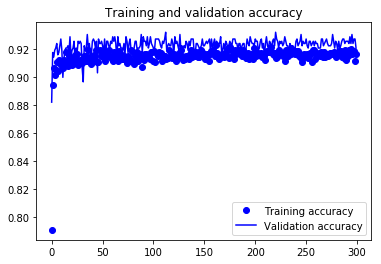

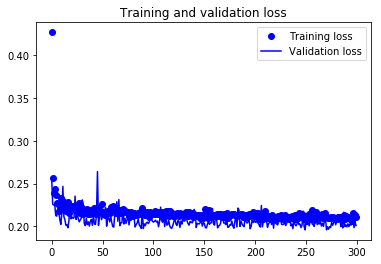

PELM_s Result
Accuracy : 0.9209677419354839
AUC : 0.9201613239401393
Sensitivity : 0.9409937888198758
Specificity : 0.8993288590604027
F1 : 0.9251908396946565
MCC : 0.8420135324127758



In [74]:
# Plot the training accuracy model Dense

accuracy = model_Dense_train.history['acc']
val_accuracy = model_Dense_train.history['val_acc']
loss = model_Dense_train.history['loss']
val_loss = model_Dense_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Dense Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Dense Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_Dense.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()

In [12]:
# library Transformer

def GetPosEncodingMatrix(max_len, d_emb):
    pos_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
        if pos != 0 else np.zeros(d_emb) 
            for pos in range(max_len)
            ])
    pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
    pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
    return pos_enc

class LayerNormalization(Layer):
	def __init__(self, eps=1e-6, **kwargs):
		self.eps = eps
		super(LayerNormalization, self).__init__(**kwargs)
	def build(self, input_shape):
		self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
									 initializer=Ones(), trainable=True)
		self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
									initializer=Zeros(), trainable=True)
		super(LayerNormalization, self).build(input_shape)
	def call(self, x):
		mean = K.mean(x, axis=-1, keepdims=True)
		std = K.std(x, axis=-1, keepdims=True)
		return self.gamma * (x - mean) / (std + self.eps) + self.beta
	def compute_output_shape(self, input_shape):
		return input_shape
    
class ScaledDotProductAttention():
	def __init__(self, d_model, attn_dropout=0.1):
		self.temper = np.sqrt(d_model)
		self.dropout = Dropout(attn_dropout)
	def __call__(self, q, k, v, mask):
		attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
		if mask is not None:
			mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
			attn = Add()([attn, mmask])
		attn = Activation('softmax')(attn)
		attn = self.dropout(attn)
		output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
		return output, attn
    
class MultiHeadAttention():
	# mode 0 - big martixes, faster; mode 1 - more clear implementation
	def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
		self.mode = mode
		self.n_head = n_head
		self.d_k = d_k
		self.d_v = d_v
		self.dropout = dropout
		if mode == 0:
			self.qs_layer = Dense(n_head*d_k, use_bias=False)
			self.ks_layer = Dense(n_head*d_k, use_bias=False)
			self.vs_layer = Dense(n_head*d_v, use_bias=False)
		elif mode == 1:
			self.qs_layers = []
			self.ks_layers = []
			self.vs_layers = []
			for _ in range(n_head):
				self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
				self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
				self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
		self.attention = ScaledDotProductAttention(d_model)
		self.layer_norm = LayerNormalization() if use_norm else None
		self.w_o = TimeDistributed(Dense(d_model))

	def __call__(self, q, k, v, mask=None):
		d_k, d_v = self.d_k, self.d_v
		n_head = self.n_head

		if self.mode == 0:
			qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
			ks = self.ks_layer(k)
			vs = self.vs_layer(v)

			def reshape1(x):
				s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
				x = tf.reshape(x, [s[0], s[1], n_head, s[2]//n_head])
				x = tf.transpose(x, [2, 0, 1, 3])  
				x = tf.reshape(x, [-1, s[1], s[2]//n_head])  # [n_head * batch_size, len_q, d_k]
				return x
			qs = Lambda(reshape1)(qs)
			ks = Lambda(reshape1)(ks)
			vs = Lambda(reshape1)(vs)

			if mask is not None:
				mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
			head, attn = self.attention(qs, ks, vs, mask=mask)  
				
			def reshape2(x):
				s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
				x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
				x = tf.transpose(x, [1, 2, 0, 3])
				x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
				return x
			head = Lambda(reshape2)(head)
		elif self.mode == 1:
			heads = []; attns = []
			for i in range(n_head):
				qs = self.qs_layers[i](q)   
				ks = self.ks_layers[i](k) 
				vs = self.vs_layers[i](v) 
				head, attn = self.attention(qs, ks, vs, mask)
				heads.append(head); attns.append(attn)
			head = Concatenate()(heads) if n_head > 1 else heads[0]
			attn = Concatenate()(attns) if n_head > 1 else attns[0]

		outputs = self.w_o(head)
		outputs = Dropout(self.dropout)(outputs)
		if not self.layer_norm: return outputs, attn
		outputs = Add()([outputs, q])
		return self.layer_norm(outputs), attn

class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='relu')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        output = self.layer_norm(output)
        return output
    
class EncoderLayer():
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        self.self_att_layer = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        self.pos_ffn_layer  = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)
    def __call__(self, enc_input, mask=None):
        output, slf_attn = self.self_att_layer(enc_input, enc_input, enc_input, mask=mask)
        output = self.pos_ffn_layer(output)
        return output, slf_attn

In [59]:
#Transformer

epochs = 100
d_model = 16
d_emb = d_model
d_inner_hid = 2*d_model
n_head = 4
d_k = d_model//4
d_v = d_model//4
dropout = 0.5

inp = Input(shape=(9,))

emb = Embedding(20, d_emb, input_length=9)(inp)

out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(emb)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out, slf_attn = EncoderLayer(d_emb, d_inner_hid, n_head, d_k, d_v, dropout)(out)
out = GlobalAveragePooling1D()(out)

out = Dense(2, activation='softmax')(out)

model_transformer = Model(inputs=inp, outputs=out)
model_transformer.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

# model.summary()
# Callback

def step_decay(epoch):
   if (0 <= epoch <= 30):
    lrate = 1e-1
   elif (30 < epoch <= 60):
    lrate = 1e-2
   elif (60 < epoch):
    lrate = 1e-3

   return lrate
lrate = LearningRateScheduler(step_decay, verbose=1)
callbacks_list = [lrate]

In [60]:
# Training model transformer

model_transformer_train = model_transformer.fit(train_X, train_Y, epochs=epochs, batch_size=32, validation_data=(valid_X, valid_Y), 
   callbacks=callbacks_list)


Train on 2477 samples, validate on 620 samples
Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 61s 25ms/step - loss: 0.7293 - acc: 0.5188 - val_loss: 0.6966 - val_acc: 0.4806
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.7072 - acc: 0.5176 - val_loss: 0.7320 - val_acc: 0.5194
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.7071 - acc: 0.5079 - val_loss: 0.6961 - val_acc: 0.4806
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.6453 - acc: 0.6193 - val_loss: 0.4909 - val_acc: 0.8339
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.1.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.42

2477/2477 [==============================] - 3s 1ms/step - loss: 0.2559 - acc: 0.8926 - val_loss: 0.2529 - val_acc: 0.8984
Epoch 42/100

Epoch 00042: LearningRateScheduler setting learning rate to 0.01.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2589 - acc: 0.8878 - val_loss: 0.2533 - val_acc: 0.9000
Epoch 43/100

Epoch 00043: LearningRateScheduler setting learning rate to 0.01.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2563 - acc: 0.8930 - val_loss: 0.2491 - val_acc: 0.8935
Epoch 44/100

Epoch 00044: LearningRateScheduler setting learning rate to 0.01.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2571 - acc: 0.8938 - val_loss: 0.2509 - val_acc: 0.9000
Epoch 45/100

Epoch 00045: LearningRateScheduler setting learning rate to 0.01.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2565 - acc: 0.8902 - val_loss: 0.2559 - val_acc: 0.8984
Epoch 46/100

Epoch 00046: LearningRateScheduler setting learning

2477/2477 [==============================] - 3s 1ms/step - loss: 0.2515 - acc: 0.8946 - val_loss: 0.2529 - val_acc: 0.9000
Epoch 82/100

Epoch 00082: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2555 - acc: 0.8922 - val_loss: 0.2528 - val_acc: 0.9000
Epoch 83/100

Epoch 00083: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2548 - acc: 0.8930 - val_loss: 0.2527 - val_acc: 0.9000
Epoch 84/100

Epoch 00084: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2534 - acc: 0.8930 - val_loss: 0.2523 - val_acc: 0.9000
Epoch 85/100

Epoch 00085: LearningRateScheduler setting learning rate to 0.001.
2477/2477 [==============================] - 3s 1ms/step - loss: 0.2510 - acc: 0.8926 - val_loss: 0.2524 - val_acc: 0.9000
Epoch 86/100

Epoch 00086: LearningRateScheduler setting lear

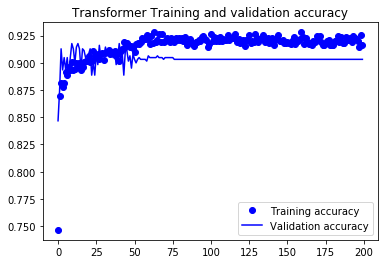

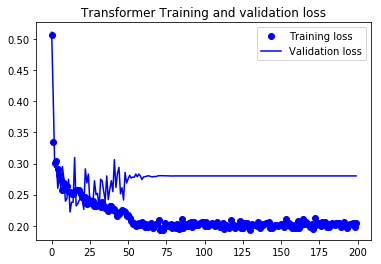

PELM_s Result
Accuracy : 0.9032258064516129
AUC : 0.9009546041935887
Sensitivity : 0.9596273291925466
Specificity : 0.8422818791946308
F1 : 0.911504424778761
MCC : 0.8102784823781962



In [53]:
# Plot the training accuracy model transformer

accuracy = model_transformer_train.history['acc']
val_accuracy = model_transformer_train.history['val_acc']
loss = model_transformer_train.history['loss']
val_loss = model_transformer_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Transformer Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Transformer Training and validation loss')
plt.legend()
plt.show()

y_pred = np.argmax(model_transformer.predict(valid_X), axis=1)
y_true = np.argmax(valid_Y, axis = 1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
sensi = tp/(tp+fn)
specificity = tn/(tn+fp)
accu = (tn + tp)/(tn + tp + fn + fp)
mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sensi)
print('Specificity :', specificity)
print('F1 :', f1)
print('MCC :', mcc)
print()